#### WHAT CONSTITIUES AS EDA

1. DATA CLEANING
1. DATA TRANSFORMATION
2. DATA VISUALIZATION
1. SUMMARY STATS
1. IDENTIFYING PATTERNS
1. HYPOTHESIS GENERATION


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
loan = pd.read_csv(r'C:\Users\stanz\OneDrive\Desktop\H_maksad\playgroud-series-s4e10\train.csv')
loan = loan.head(100)

In [9]:
# Selecting numeric columns
df = loan
numeric_cols = df.select_dtypes(include=[int, float]).columns.tolist()
numeric_cols

['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']

In [10]:
non_numeric = list(set(loan.columns)-set(numeric_cols))

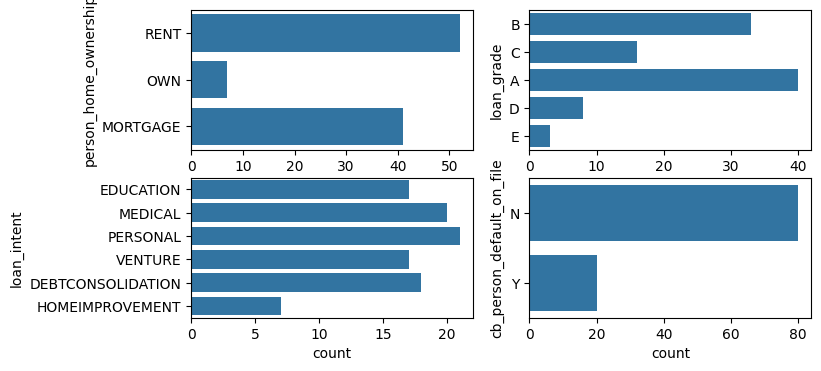

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
# Plot 1: Seaborn scatterplot
k=0
for i in range(0,2):
    for j in range(0,2):    
        sns.countplot(data=loan[non_numeric[k]], ax=axes[i, j])
        k +=1

<Axes: xlabel='person_age', ylabel='person_income'>

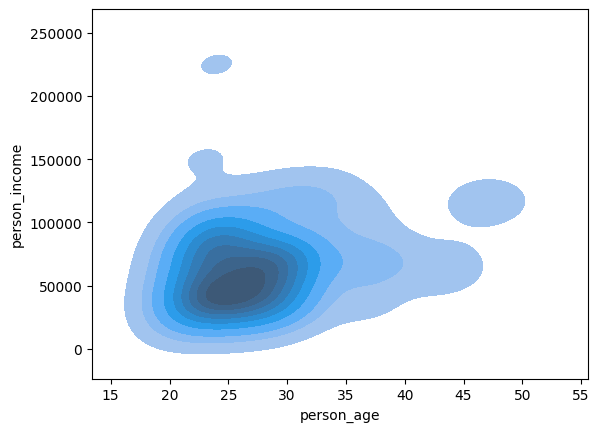

In [18]:
sns.kdeplot(x=loan['person_age'],y=loan.person_income,fill=True)

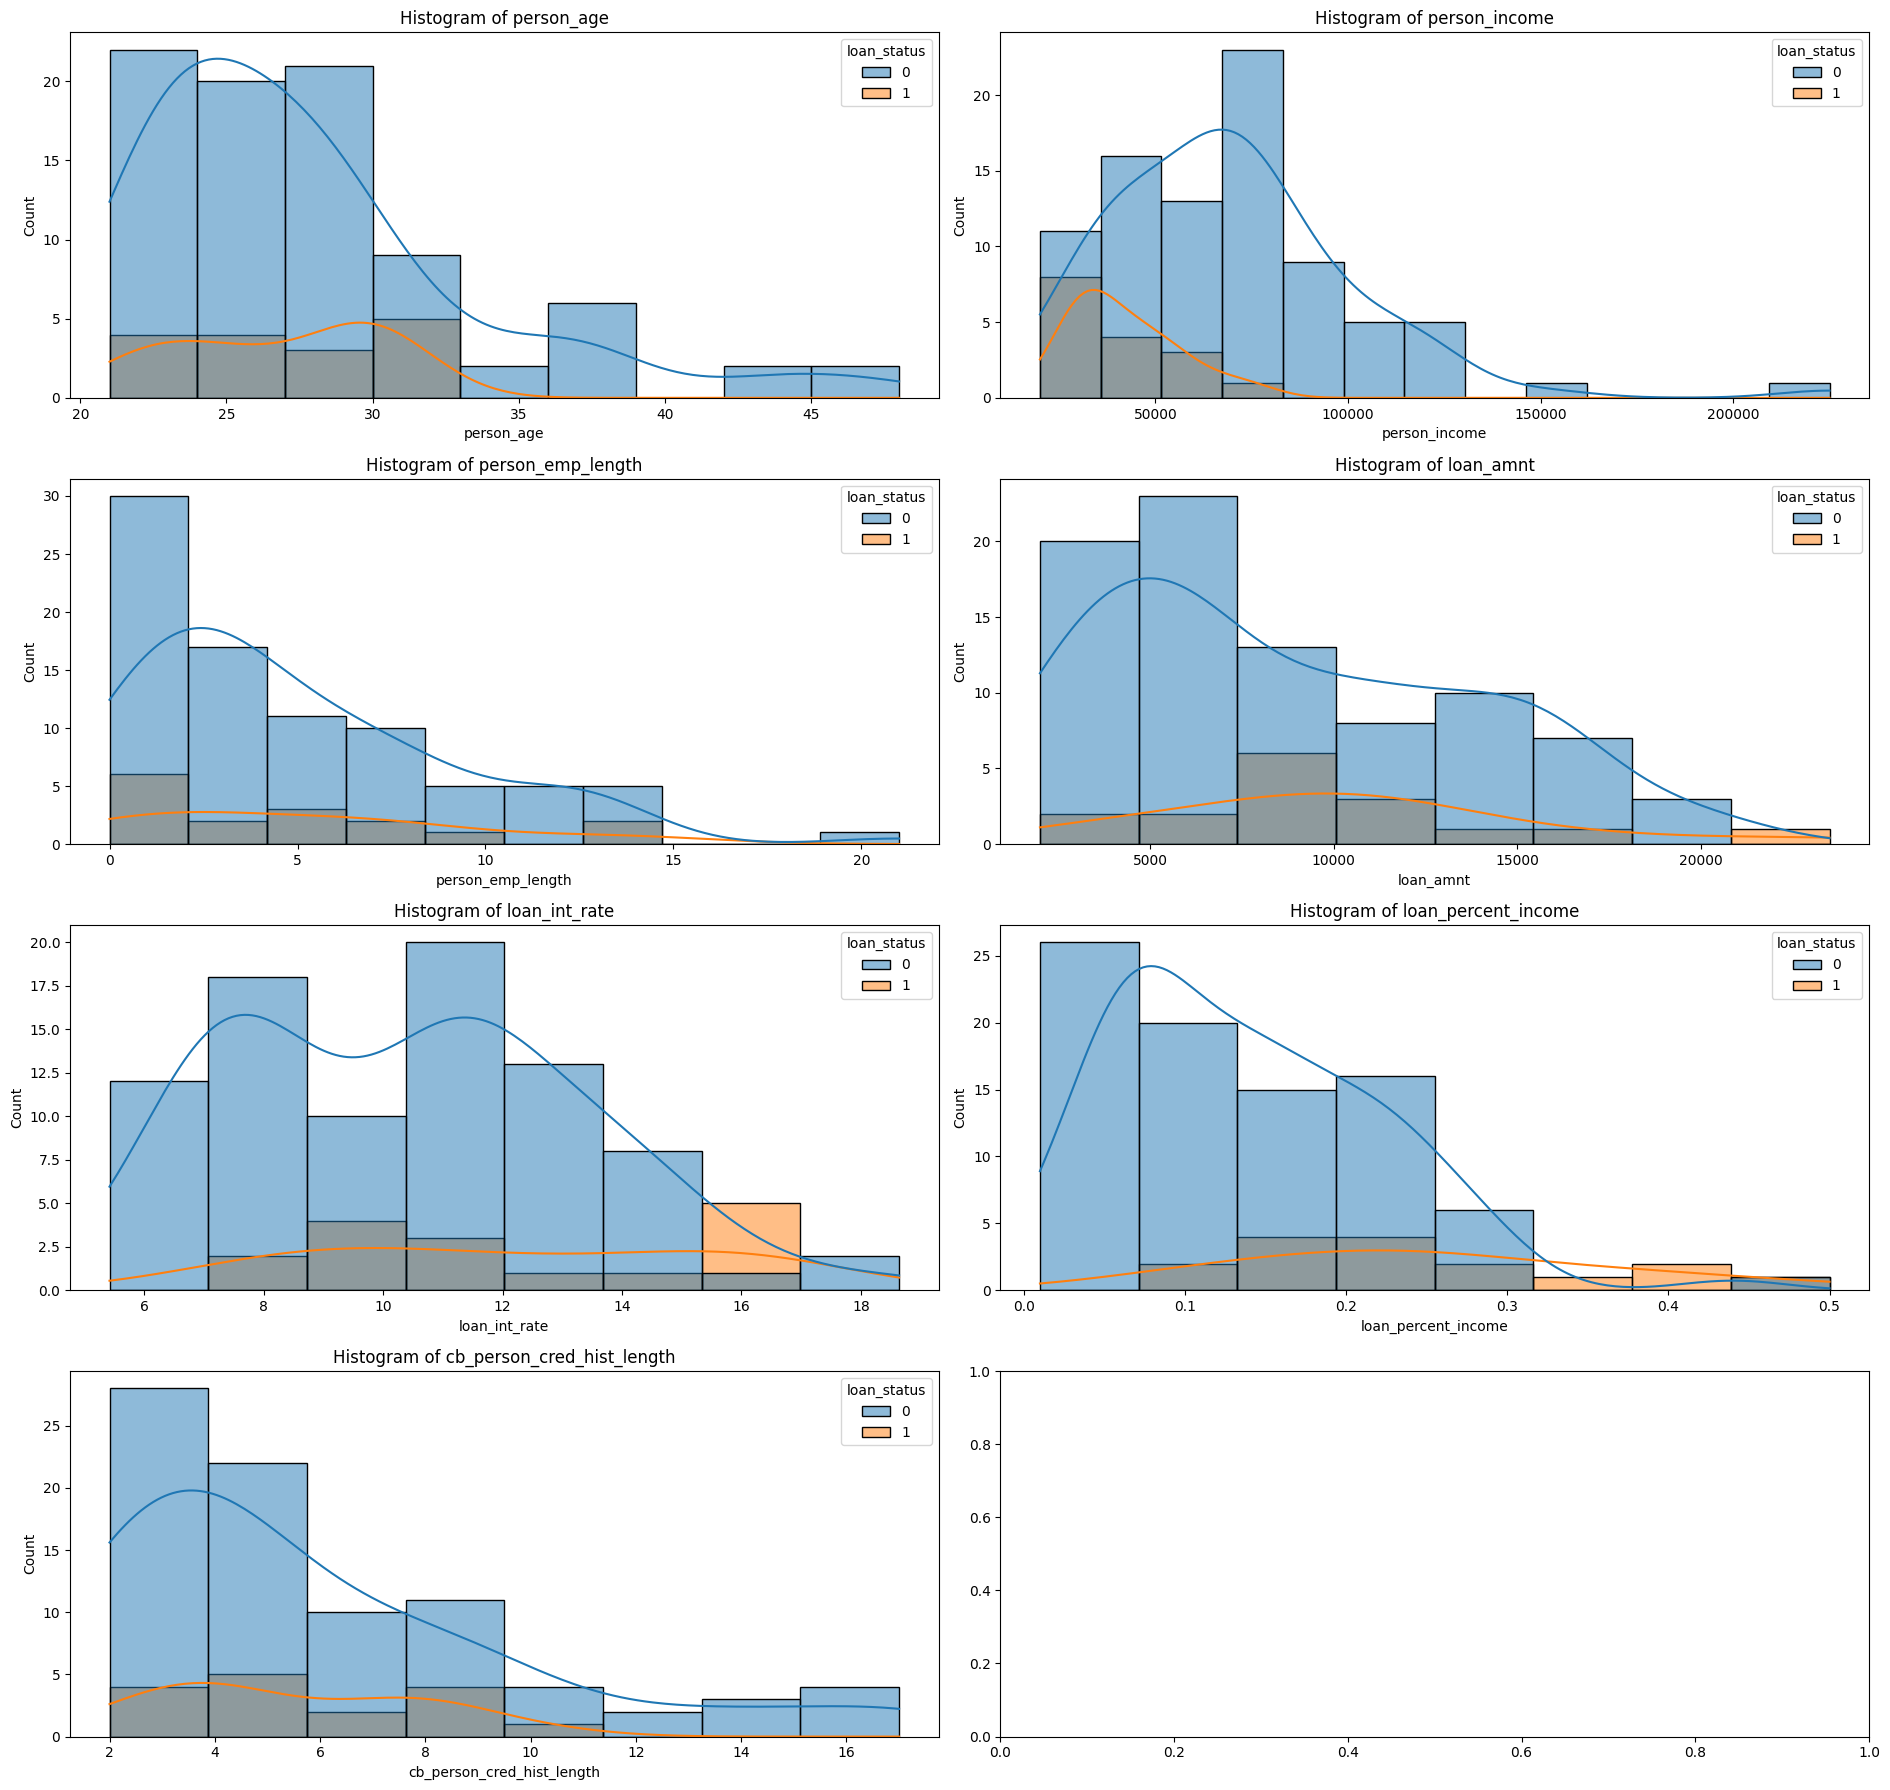

In [131]:
fig, axes = plt.subplots(4, 2, figsize=(19, 18))
axes = axes.flatten()
numeric_cols = numeric_cols[1:]
# Plot histograms for each numeric column
for k in range(len(numeric_cols)-1):
    sns.histplot(data=loan, x=numeric_cols[k], ax=axes[k],kde=True,hue='loan_status')
    axes[k].set_title(f'Histogram of {numeric_cols[k]}')

# Adjust layout
plt.tight_layout()
plt.show()


In [139]:
numeric_cols[1:-1]

['person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

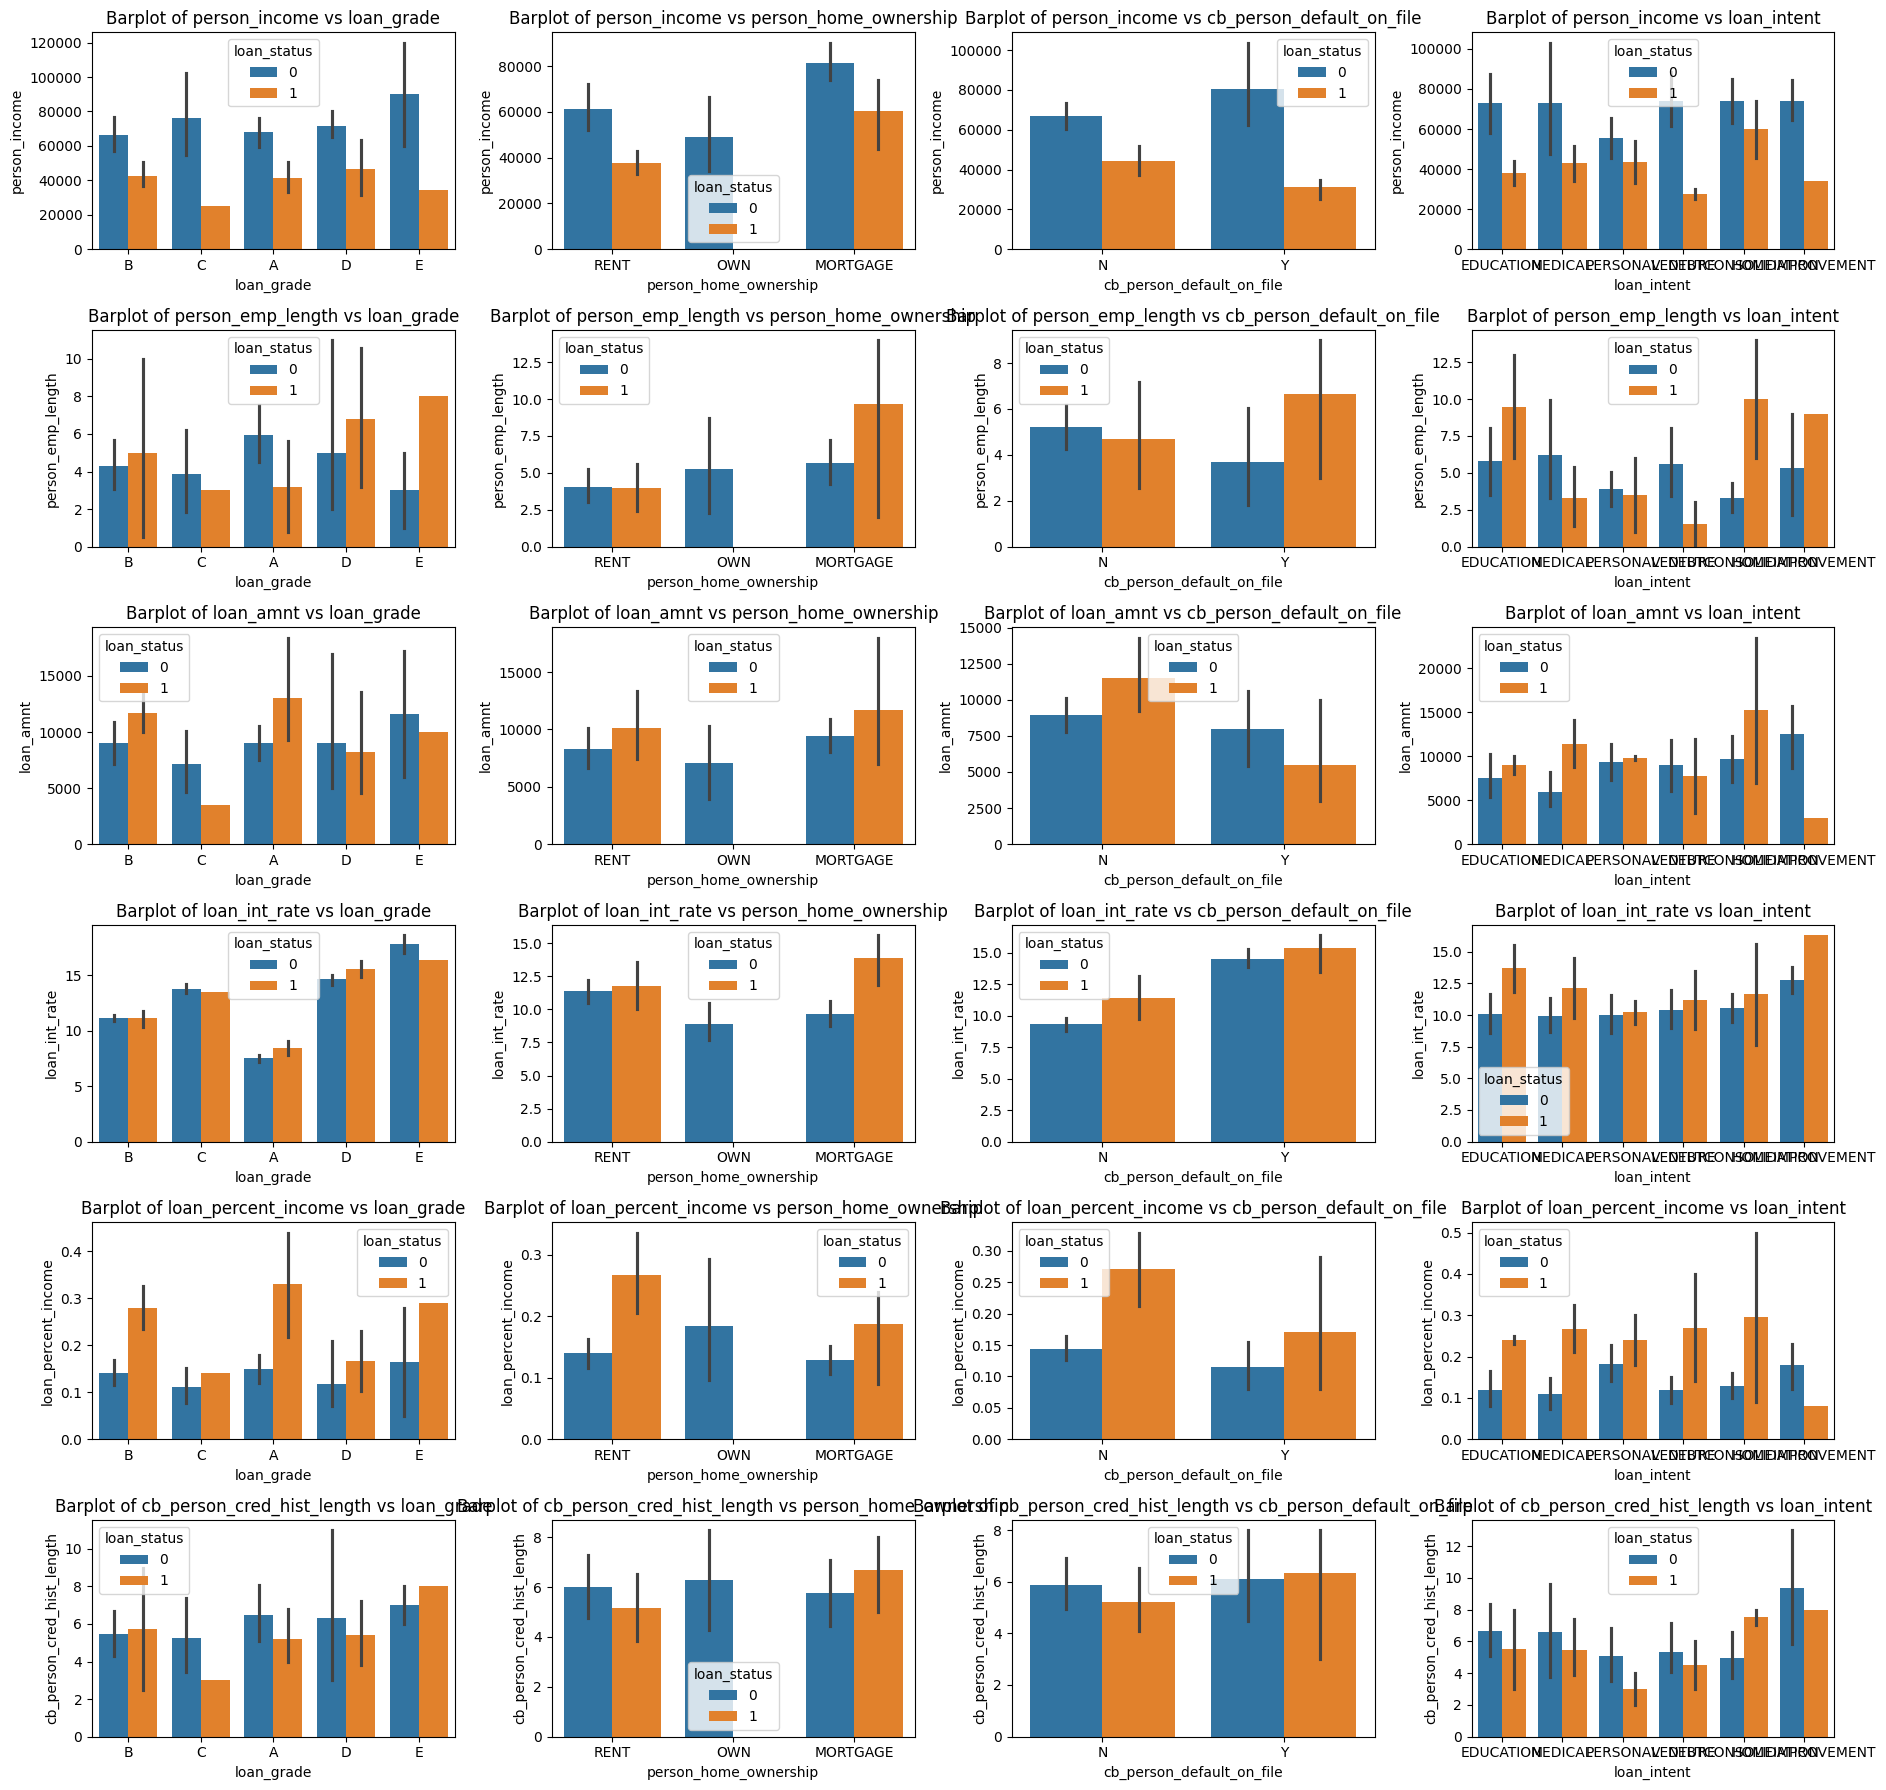

In [140]:

fig, axes = plt.subplots(len(numeric_cols[1:-1]), len(non_numeric), figsize=(19, 18))
axes = axes.flatten()
numeric_cols = numeric_cols[1:-1]

# Plot barplots for each combination of numeric and non-numeric columns
for k in range(len(numeric_cols)):
    for j in range(len(non_numeric)):
        sns.barplot(data=loan, x=non_numeric[j], y=numeric_cols[k], hue='loan_status', ax=axes[k * len(non_numeric) + j])
        axes[k * len(non_numeric) + j].set_title(f'Barplot of {numeric_cols[k]} vs {non_numeric[j]}')

# Adjust layout
plt.tight_layout()
plt.show()


In [132]:
m = loan[numeric_cols].corr()

<Axes: >

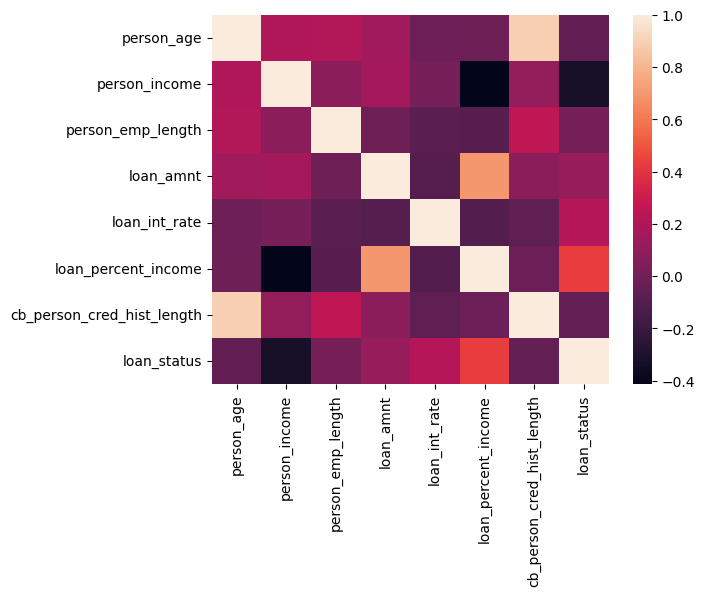

In [133]:
matrix = loan[numeric_cols].corr()
sns.heatmap(data=matrix)

<Axes: ylabel='person_age'>

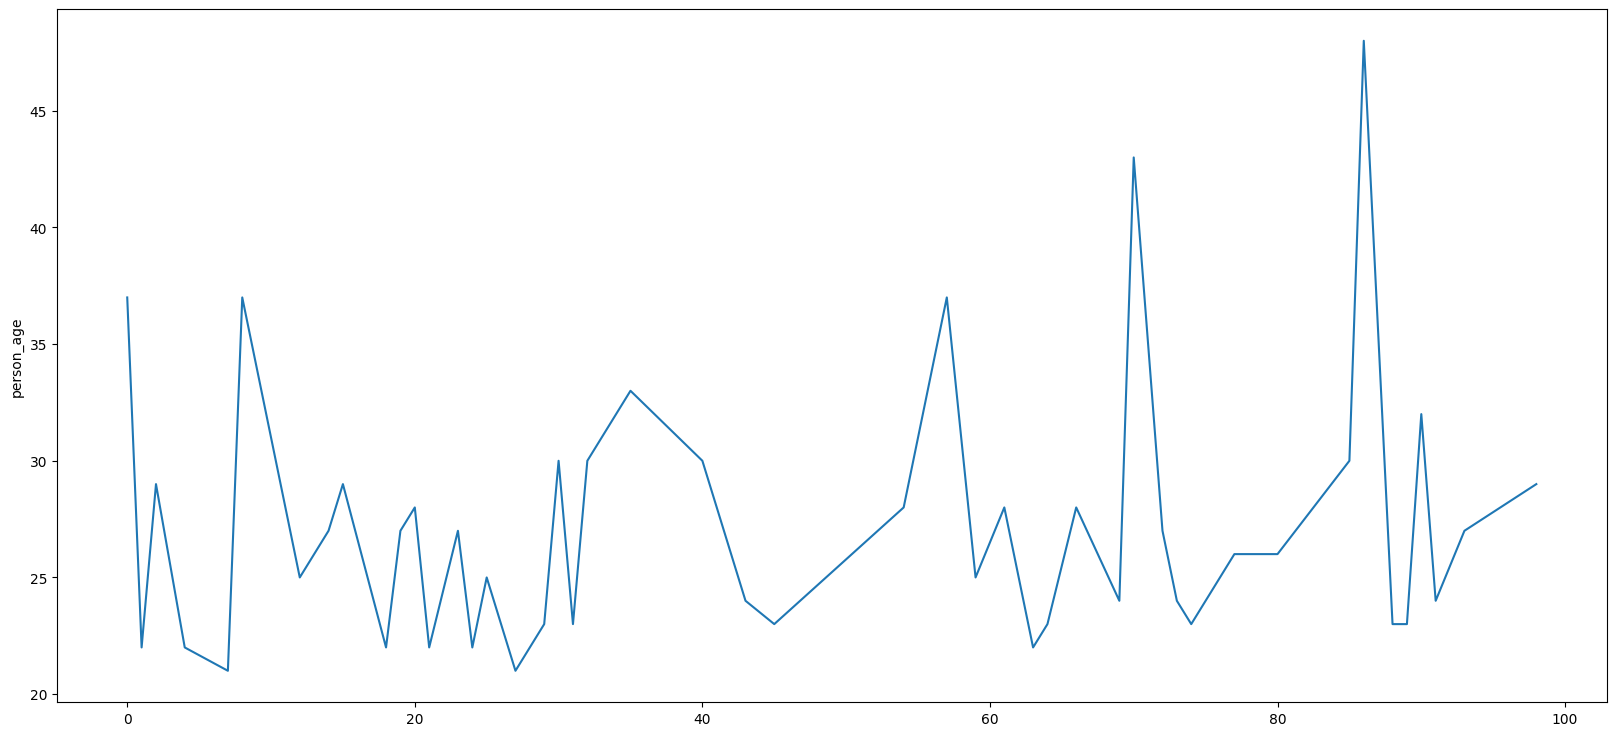

In [134]:
plt.figure(figsize=(20,9))
age = loan.person_age[loan.loan_amnt < loan.loan_amnt.quantile(0.5)]
sns.lineplot(data = age)

In [135]:
loan.loan_amnt.describe()

count      100.00000
mean      8994.25000
std       5086.43206
min       2000.00000
25%       5000.00000
50%       8000.00000
75%      12000.00000
max      23500.00000
Name: loan_amnt, dtype: float64

In [74]:
loan.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,27.480000,65081.92000,4.920000,8994.25000,10.673100,0.156500,5.840000,0.160000
std,29.011492,5.450382,31438.57342,4.241879,5086.43206,3.040734,0.097384,3.799841,0.368453
min,0.000000,21.000000,20000.00000,0.000000,2000.00000,5.420000,0.010000,2.000000,0.000000
25%,24.750000,23.000000,41500.00000,2.000000,5000.00000,7.845000,0.070000,3.000000,0.000000
50%,49.500000,26.500000,61450.00000,4.000000,8000.00000,10.750000,0.140000,4.500000,0.000000
75%,74.250000,30.000000,78500.00000,7.000000,12000.00000,12.792500,0.220000,8.000000,0.000000
max,99.000000,48.000000,225000.00000,21.000000,23500.00000,18.640000,0.500000,17.000000,1.000000


In [107]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          100 non-null    int64  
 1   person_age                  100 non-null    int64  
 2   person_income               100 non-null    int64  
 3   person_home_ownership       100 non-null    object 
 4   person_emp_length           100 non-null    float64
 5   loan_intent                 100 non-null    object 
 6   loan_grade                  100 non-null    object 
 7   loan_amnt                   100 non-null    int64  
 8   loan_int_rate               100 non-null    float64
 9   loan_percent_income         100 non-null    float64
 10  cb_person_default_on_file   100 non-null    object 
 11  cb_person_cred_hist_length  100 non-null    int64  
 12  loan_status                 100 non-null    int64  
dtypes: float64(3), int64(6), object(4)
m

#### To test if the means of a numerical variable differ across different categories.

In [109]:
from scipy.stats import f_oneway

# ANOVA to test if loan amounts differ by loan intent
groups = [loan[loan['loan_intent'] == intent]['loan_amnt'] for intent in loan['loan_intent'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 0.9445771271127487, P-value: 0.45605643809440644


#### To test if two categorical variables are independent

In [110]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(loan['loan_intent'], loan['loan_grade'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, P-value: {p}")


Chi2 Statistic: 16.668100826189058, P-value: 0.6744081048042198


#### To test the strength and direction of the linear relationship between two numerical variables.

In [112]:
from scipy.stats import pearsonr

# Pearson correlation between loan amount and loan interest rate
corr, p_value = pearsonr(loan['loan_amnt'], loan['loan_int_rate'])
print(f"Correlation coefficient: {corr}, P-value: {p_value}")


Correlation coefficient: -0.09779352902764987, P-value: 0.33306292679112987


In [5]:
import scipy.stats as stats

stats.probplot(loan, dist="norm", plot=plt)
plt.title('Probability Plot')
plt.show()


TypeError: '<' not supported between instances of 'str' and 'int'